### Imports

In [1]:
import pathlib
import torch
import torchvision
from torchvision.datasets import MNIST
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set()
import numpy as np

### Load dataset

In [2]:
dataset = MNIST(root=pathlib.Path('./input'), download=True)

/usr/local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


- train, testは既に分かれている状態のようだ。
  - 実務では、MNISTというクラスと同じようなものをデータ毎に作成する必要がある。

In [37]:
dataset_tr = MNIST(root=pathlib.Path('./input'), train=True)
dataset_tt = MNIST(root=pathlib.Path('./input'), train=False)
display(f"train_num: {len(dataset_tr)}, test_num: {len(dataset_tt)}")

'train_num: 60000, test_num: 10000'

- 1サンプルのデータは、tupleとなっており、画像データとラベルの組である。
  - PIL.Imageは画像を扱うデータタイプ。
  - PIL自体は、更新が2009年で止まっているライブラリだが、<br>
  歴史的経緯からデータ型としては残っているようだ。
  - PILは今は、Pillowにフォークしている。

In [4]:
display(f"type: {type(dataset_tr[0])}")
display(f"value: {dataset_tr[0]}")
display(f"type: {type(dataset_tt[0])}")
display(f"value: {dataset_tt[0]}")

"type: <class 'tuple'>"

'value: (<PIL.Image.Image image mode=L size=28x28 at 0x7FA4451F2850>, 5)'

"type: <class 'tuple'>"

'value: (<PIL.Image.Image image mode=L size=28x28 at 0x7FA4451F2850>, 7)'

- PIL.Image.Imageは、numpyと相互変換できる。
  - dtypeはuint8になっているようだ。

In [40]:
arr = np.asarray(dataset_tr[0][0])
display(f"type: {type(arr)}, dtype: {arr.dtype}, shape: {arr.shape}")

img = Image.fromarray(arr)
display(img)

"type: <class 'numpy.ndarray'>, dtype: uint8, shape: (28, 28)"

- 画像を見るとこんな感じ。

'label: 7'

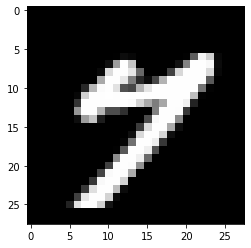

In [41]:
image, label = dataset_tr[1001]
display(f"label: {label}")
plt.imshow(image, cmap='gray')

- 実際には、numpy変換にしなくとも、MNISTというモジュールで良い感じにtensorにしてくれる。
  - この良い感じにする部分は、自分で作れる必要があるんだろう。
- 形式がtensorになっているだけではなく、0～1に勝手に正規化してる部分は少し癖つよい。

In [42]:
import torchvision.transforms as transforms
dataset_tr = MNIST(root='./input', 
                train=True,
                transform=transforms.ToTensor())

image, label = dataset_tr[1001]

display(f"type: {type(image)}, dtype: {image.dtype}, shape: {image.shape}")
display(f"type: {type(label)}")

"type: <class 'torch.Tensor'>, dtype: torch.float32, shape: torch.Size([1, 28, 28])"

"type: <class 'int'>"

- そしてこの